In [1]:
import pandas as pd

# Data Upload

In [63]:
df= pd.read_excel("1.5 MLD (Outlet COD).xlsx")
df

,STP_Inlet-COD_U,STP_Inlet-BOD_U,STP_Inlet-TSS_U,STP_Inlet-Total_nitrogen_U,STP_Inlet-Total Phosphorus_U,STP_Outlet-COD_U
0,170.4,64.4,108.6,67.0,6.3,56.7
1,170.2,64.3,108.7,76.8,6.1,57.1
2,175.6,65.0,113.4,64.6,5.7,57.7
3,173.2,63.3,112.2,83.1,6.1,58.4
4,170.6,61.6,111.5,52.3,5.0,58.6
...,...,...,...,...,...,...
362,259.8,143.2,160.8,2.9,6.8,41.1
363,266.3,143.3,170.9,6.7,6.8,41.4
364,280.7,142.0,202.6,6.7,6.9,41.5
365,287.9,138.7,220.5,4.3,6.5,41.7


# Data preparation

## Separation of data in X and Y

In [64]:
y= df['STP_Outlet-COD_U']
y

0      56.7
1      57.1
2      57.7
3      58.4
4      58.6
       ... 
362    41.1
363    41.4
364    41.5
365    41.7
366    42.1
Name: STP_Outlet-COD_U, Length: 367, dtype: float64

In [65]:
x= df.drop('STP_Outlet-COD_U', axis=1)
x

,STP_Inlet-COD_U,STP_Inlet-BOD_U,STP_Inlet-TSS_U,STP_Inlet-Total_nitrogen_U,STP_Inlet-Total Phosphorus_U
0,170.4,64.4,108.6,67.0,6.3
1,170.2,64.3,108.7,76.8,6.1
2,175.6,65.0,113.4,64.6,5.7
3,173.2,63.3,112.2,83.1,6.1
4,170.6,61.6,111.5,52.3,5.0
...,...,...,...,...,...
362,259.8,143.2,160.8,2.9,6.8
363,266.3,143.3,170.9,6.7,6.8
364,280.7,142.0,202.6,6.7,6.9
365,287.9,138.7,220.5,4.3,6.5


## Data splitting

In [221]:
import numpy as np
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=75)

### Training Data

In [222]:
x_train

,STP_Inlet-COD_U,STP_Inlet-BOD_U,STP_Inlet-TSS_U,STP_Inlet-Total_nitrogen_U,STP_Inlet-Total Phosphorus_U
68,173.9,62.4,129.8,62.4,6.3
193,193.9,89.1,134.8,9.2,5.7
7,166.5,60.8,107.3,32.2,6.3
234,198.1,84.1,142.5,18.8,7.2
203,196.4,94.4,134.4,4.3,4.4
...,...,...,...,...,...
34,176.0,75.6,108.8,33.3,6.5
26,180.6,76.0,112.6,43.9,6.7
136,186.1,83.4,130.0,20.7,6.7
19,173.2,69.8,109.0,36.4,5.0


### Testing Data

In [223]:
x_test

,STP_Inlet-COD_U,STP_Inlet-BOD_U,STP_Inlet-TSS_U,STP_Inlet-Total_nitrogen_U,STP_Inlet-Total Phosphorus_U
245,199.6,97.9,136.4,11.1,5.1
42,174.9,75.6,108.3,27.5,6.4
247,200.1,101.8,135.1,7.8,3.7
345,245.5,134.9,154.9,2.4,5.6
177,212.1,120.8,145.6,2.9,4.9
...,...,...,...,...,...
261,198.3,94.4,136.8,0.7,6.0
169,202.9,109.4,138.1,4.4,6.3
36,176.1,76.2,110.9,20.8,6.2
121,181.4,73.5,132.6,30.1,6.9


In [224]:
y_train

68     41.8
193    43.3
7      59.7
234    45.2
203    43.4
       ... 
34     41.4
26     41.3
136    42.4
19     41.3
248    45.6
Name: STP_Outlet-COD_U, Length: 293, dtype: float64

## Model Building

### Random Forest

### Training

In [235]:
rf= RandomForestRegressor( max_depth= 20, random_state=100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=20, random_state=100)

### Prediction by model

In [236]:
y_rf_train_pred= rf.predict(x_train)
y_rf_test_pred= rf.predict(x_test)

### Evaluation of Model

In [237]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse= mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2= r2_score(y_train, y_rf_train_pred)

rf_test_mse= mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2= r2_score(y_test, y_rf_test_pred)

In [238]:
rf_test_r2

0.5590114234721573

In [234]:
import pandas as pd
rf_results= pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results

,0,1,2,3,4
0,Random Forest,2.134102,0.883576,8.076883,0.485597


In [238]:
rf_test_r2

0.5590114234721573

In [183]:
import pandas as pd
rf_results= pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results

,0,1,2,3,4
0,Random Forest,2.124438,0.884103,6.924168,0.559011


In [143]:
rf_results.columns = ['Methods', 'Train MSE','Train R2', 'Test MSE', 'Test R2']
rf_results

,Methods,Train MSE,Train R2,Test MSE,Test R2
0,Random Forest,1.633575,0.897506,19.923085,0.20361


#### The lower the MSE, the better the model predictive accuracy, and, the better the regression model is.The greater the value of R-Squared, the better is the regression model.

In [117]:
import matplotlib.pyplot as plt
import numpy as num

Text(0, 0.5, 'Y_Train_Prediction')

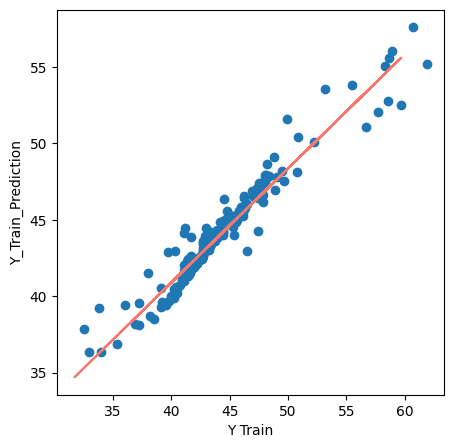

In [142]:
plt.figure(figsize=(5,5))

plt.scatter (y=y_rf_train_pred, x=y_train, label='Original')



z= np.polyfit (y_train, y_rf_train_pred,1)
p= np.poly1d(z)

plt.plot(y_test, p(y_test), '#F8776D')
plt.xlabel('Y Train')
plt.ylabel('Y_Train_Prediction')

Text(0, 0.5, 'Y_Test_Prediction')

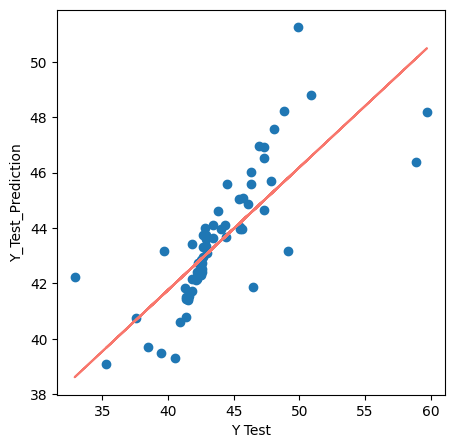

In [184]:
plt.figure(figsize=(5,5))

plt.scatter (y=y_rf_test_pred, x=y_test, label='Original')



z= np.polyfit (y_test, y_rf_test_pred,1)
p= np.poly1d(z)

plt.plot(y_test, p(y_test), '#F8776D')
plt.xlabel('Y Test')
plt.ylabel('Y_Test_Prediction')